# Visualizing Measures of PI Violations

In [1]:
# import the Profile class

from voting.profiles import *

# import the voting methods

from voting.voting_methods import _num_rank_first
from voting.voting_methods import *

import math
import random
import pandas as pd
from itertools import product, combinations, product
from functools import partial
from multiprocess import Pool, cpu_count
import pickle
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import copy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Figure 2

In [2]:
data_remove_cands = pickle.load(open('data/IC_data_pi_violations_remove_voters.pkl', "rb"))
data_remove_cands_new = pickle.load(open('data/IC_data_pi_violations_remove_voters_new_methods2.pkl', "rb"))


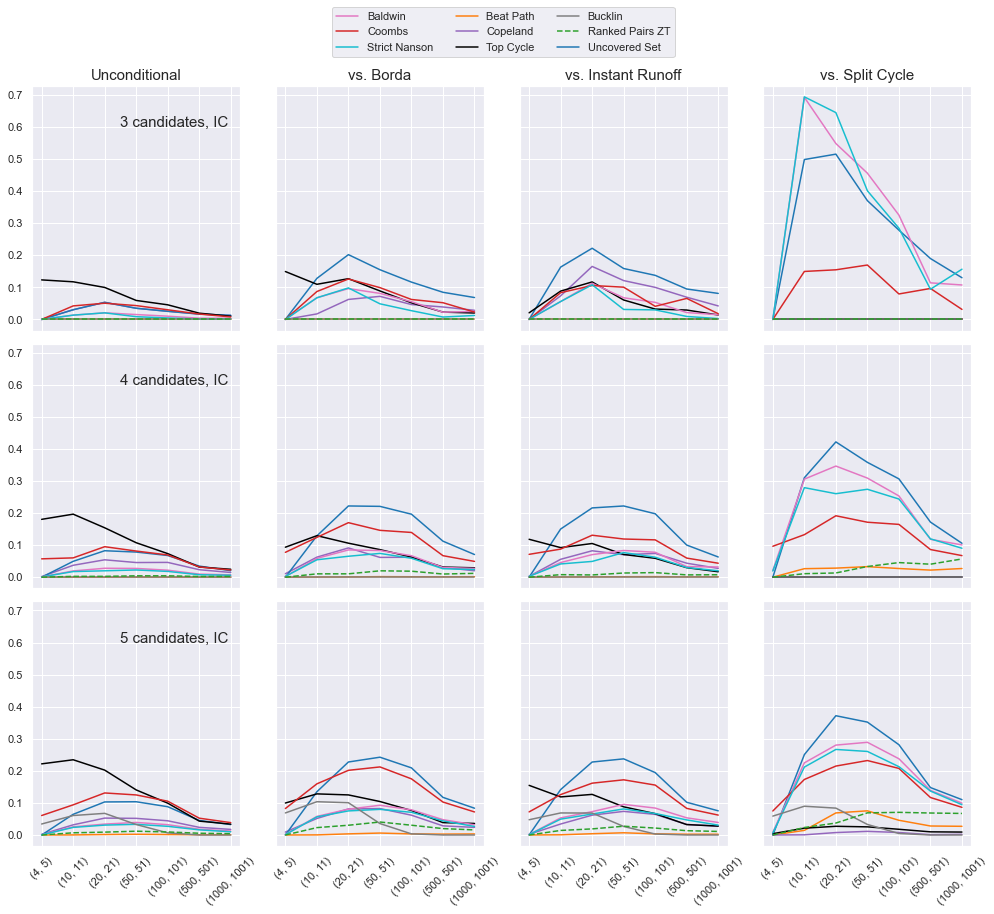

In [3]:
num_cands = [
    3,
    4,
    5,
#     6,
#     7,
#    8, 
#     10, 

]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 

] 


prob_models = [
    "IC", 
#      "IAC", 
#      "MALLOWS", 
#      "MALLOWS_2REF", 
#      "URN", 
#      "SinglePeaked",
#      "SPATIAL", 
]
 

vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]


vms_violate_pi_new = {
    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
    blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}
current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "Beat Path": current_palette[1], 
    "Coombs": current_palette[3], 
    "Copeland": current_palette[4],
    "Borda": current_palette[5],
    "Baldwin": current_palette[6],
    "Top Cycle": "black",  
    "Bucklin": current_palette[7],
    "Strict Nanson": current_palette[9], 
    "Ranked Pairs": current_palette[2],
    "Ranked Pairs ZT": current_palette[2]
}

line_styles = {
    "Uncovered Set": "-", 
    "Beat Path":  "-",
    "Coombs":  "-",
    "Copeland":  "-",
    "Borda":  "-",
    "Baldwin":  "-",
    "Top Cycle":  "-", 
    "Bucklin":  "-",
    "Strict Nanson":  "-", 
    "Ranked Pairs":  "-",
    "Ranked Pairs ZT":  "--",  
}

new_colors = [current_palette[8]]


def gen_fig2():

    fig, axs = plt.subplots(nrows=len(num_cands), ncols=4, figsize=(14, 12), sharex=True, sharey=True)

    def get_frequencies(data, freq_type, vm_to_compare, vm, num_voters, nc): 

        if vm.name == "Bucklin" or vm.name == "Ranked Pairs ZT":
            _data = data_remove_cands_new
        else: 
            _data = data
        return [_data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_pi_failure"] 
                for nv in num_voters]


    xs = [str(nv) for nv in num_voters]

    vm_to_compare = split_cycle_faster
    # ALL

    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "all", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)



    
    axs[0][0].set_title("Unconditional", fontsize=15)
    axs[0][1].set_title("vs. Borda", fontsize=15)
    axs[0][2].set_title("vs. Instant Runoff", fontsize=15)
    axs[0][3].set_title("vs. Split Cycle", fontsize=15)

    axs[0][0].text(2.5, 0.6, r'3 candidates, IC', fontsize=15)
    axs[1][0].text(2.5, 0.6, r'4 candidates, IC', fontsize=15)
    axs[2][0].text(2.5, 0.6, r'5 candidates, IC', fontsize=15)


    handles, labels = axs[1][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 3, 6, 1, 4, 7, 2, 5, 8]
    plt.tight_layout()
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
               bbox_to_anchor=(-1.25,3.45), 
               loc='upper center', 
               ncol = 3)
    plt.savefig("graphs_tark/remvotersfreq.pdf", bbox_inches='tight')
gen_fig2() 

In [4]:
num_cands = [
    3,
    4,
    5,
#     6,
#     7,
#    8, 
#     10, 

]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 

] 


prob_models = [
    "IC", 
#      "IAC", 
#      "MALLOWS", 
#      "MALLOWS_2REF", 
#      "URN", 
#      "SinglePeaked",
#      "SPATIAL", 
]
 

vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]


vms_violate_pi_new = {
#    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
 #   blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}

def gen_fig2_additional(vm1):
    new_vms = [vms_violate_pi_new[vm1]]

    fig, axs = plt.subplots(nrows=len(num_cands), ncols=4, figsize=(14, 12), sharex=True, sharey=True)

    def get_frequencies(data, freq_type, vm_to_compare, vm, num_voters, nc): 

        if vm.name == "Bucklin" or vm.name == "Ranked Pairs ZT":
            _data = data_remove_cands_new
        else: 
            _data = data
        return [_data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_pi_failure"] 
                for nv in num_voters]


    xs = [str(nv) for nv in num_voters]

    vm_to_compare = split_cycle_faster
    # ALL

    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "all", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    ####add new
    
    vm_to_compare = split_cycle_faster
    # ALL
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "all", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "init_diff", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "init_diff", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "init_diff", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    
    axs[0][0].set_title("Unconditional", fontsize=15)
    axs[0][1].set_title("vs. Borda", fontsize=15)
    axs[0][2].set_title("vs. Instant Runoff", fontsize=15)
    axs[0][3].set_title("vs. Split Cycle", fontsize=15)

    axs[0][0].text(2.5, 0.6, r'3 candidates, IC', fontsize=15)
    axs[1][0].text(2.5, 0.6, r'4 candidates, IC', fontsize=15)
    axs[2][0].text(2.5, 0.6, r'5 candidates, IC', fontsize=15)


    handles, labels = axs[1][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 5, 1, 6, 2, 7, 3, 8, 4, 9]
    plt.tight_layout()
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
               bbox_to_anchor=(-1.25,3.45), 
               loc='upper center', 
               ncol = 5)
    plt.show()
    
interact_manual(gen_fig2_additional, 
                vm1 = widgets.Dropdown(
                    options=[_vm for _vm in vms_violate_pi_new.keys()],
                    value= "GOCHA",
                    description='VM:',
                    disabled=False,
                ));



interactive(children=(Dropdown(description='VM:', options=('GOCHA', 'Weak Nanson', 'Daunou', 'Simplified Buckl…

### Comparing Variants of Uncovered Set 

In [5]:
num_cands = [
#    3,
#    4,
    5,
#     6,
#     7,
#    8, 
#     10, 

]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 

] 


prob_models = [
    "IC", 
#      "IAC", 
#      "MALLOWS", 
#      "MALLOWS_2REF", 
#      "URN", 
#      "SinglePeaked",
#      "SPATIAL", 
]
 

vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
# vms_violate_pi = [
# #     beat_path_faster,
# #     copeland,
# #     uc_gill,
# #     getcha, 
#     baldwin, 
#     coombs,
# #     strict_nanson, 
# #     bucklin, 
# #     ranked_pairs_v
# ]

ucs = [
    uc_gill, 
    uc_fish, 
    uc_bordes, 
    uc_mckelvey,
#    uc_right_covers
]
vms_violate_pi = ucs

current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "UC Fishburn": current_palette[1], 
    "UC Bordes": current_palette[3], 
    "UC McKelvey": current_palette[4],
    "UC Right Covers": current_palette[5],
}

pr_model_data = {
    "IC": 'UC_IAC_data_pi_violations_remove_voters.pkl',
    "IAC": 'UC_IAC_data_pi_violations_remove_voters.pkl',
    "URN": 'UC_URN_data_pi_violations_remove_voters.pkl',
    "SinglePeaked": 'UC_SinglePeaked_data_pi_violations_remove_voters.pkl',
}

def gen_fig2a(pr_model):

    print(f"\nDisplaying data for the {pr_model} probability model.\n")
    fig, axs = plt.subplots(ncols=4, figsize=(15, 5), sharex=True, sharey=True)
    
    data_remove_cands_ucs = pickle.load(open(f'data/{pr_model_data[pr_model]}', "rb"))

    def get_frequencies(data, freq_type, vm_to_compare, vm, num_voters, nc): 

        return [data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_pi_failure"] 
                for nv in num_voters]


    xs = [str(nv) for nv in num_voters]

    vm_to_compare = split_cycle_faster

    for nc_idx, nc in enumerate(num_cands):
        ax = axs[0]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_ucs, "all", vm_to_compare, vm, num_voters, nc),
                    color=colors[vm.name], 
                   )
            

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[1]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_ucs, "init_diff", vm_to_compare, vm, num_voters, nc),
                     color=colors[vm.name], 
                   )
 
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[2]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_ucs, "init_diff", vm_to_compare, vm, num_voters, nc),
                     color=colors[vm.name], 
                   )

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[3]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_ucs, "init_diff", vm_to_compare, vm, num_voters, nc),
                     color=colors[vm.name], 
                    label=vm.name)

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    axs[0].set_title("Unconditional", fontsize=15)
    axs[1].set_title("vs. Borda", fontsize=15)
    axs[2].set_title("vs. Instant Runoff", fontsize=15)
    axs[3].set_title("vs. Split Cycle", fontsize=15)

    plt.suptitle("5 Candidates")
    plt.legend(bbox_to_anchor=(0.0,1.275),  loc='right', ncol=5)
    plt.savefig("graphs_tark/remvotersfreqUCS.pdf", bbox_inches='tight')

interact_manual(gen_fig2a, 
                pr_model = widgets.Dropdown(
                    options=[pm for pm in pr_model_data.keys()],
                    value= "IC",
                    description='PR Model:',
                    disabled=False,
                ));  

interactive(children=(Dropdown(description='PR Model:', options=('IC', 'IAC', 'URN', 'SinglePeaked'), value='I…

## Figure 3

In [6]:
data_remove_cands = pickle.load(open('data/IC_data_pi_violations_remove_voters.pkl', "rb"))
data_remove_cands_new = pickle.load(open('data/IC_data_pi_violations_remove_voters_new_methods2.pkl', "rb"))


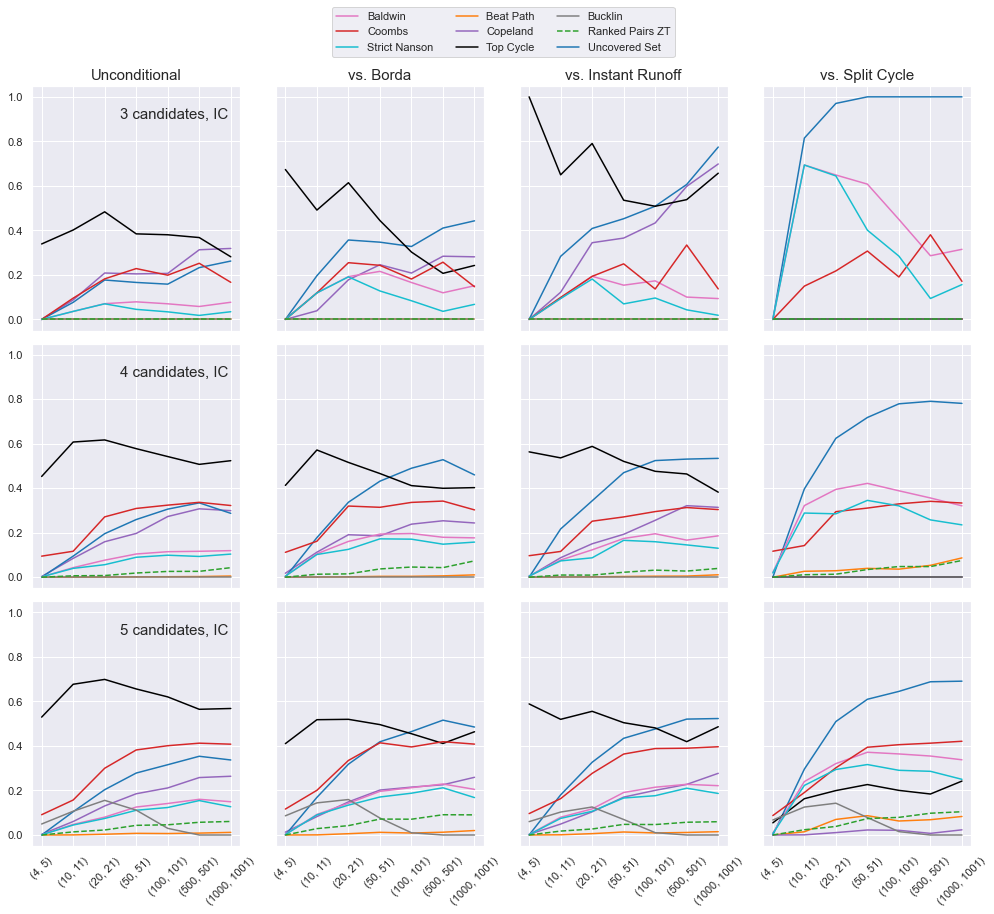

In [7]:
num_cands = [
    3,
    4,
    5,
#     6,
#     7,
#    8, 
#     10, 

]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 

] 


prob_models = [
    "IC", 
#      "IAC", 
#      "MALLOWS", 
#      "MALLOWS_2REF", 
#      "URN", 
#      "SinglePeaked",
#      "SPATIAL", 
]
 


vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]

current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "Beat Path": current_palette[1], 
    "Coombs": current_palette[3], 
    "Copeland": current_palette[4],
    "Borda": current_palette[5],
    "Baldwin": current_palette[6],
    "Top Cycle": "black",  
    "Bucklin": current_palette[7],
    "Strict Nanson": current_palette[9], 
    "Ranked Pairs": current_palette[2],
    "Ranked Pairs ZT": current_palette[2]
}

line_styles = {
    "Uncovered Set": "-", 
    "Beat Path":  "-",
    "Coombs":  "-",
    "Copeland":  "-",
    "Borda":  "-",
    "Baldwin":  "-",
    "Top Cycle":  "-", 
    "Bucklin":  "-",
    "Strict Nanson":  "-", 
    "Ranked Pairs":  "-",
    "Ranked Pairs ZT":  "--",  
}

new_colors = [current_palette[8]]

vms_violate_pi_new = {
    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
    blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}

def gen_fig3():


    fig, axs = plt.subplots(nrows=len(num_cands), ncols=4, figsize=(14, 12), sharex=True, sharey=True)

    def get_frequencies(data, freq_type, vm_to_compare, vm, num_voters, nc): 

        if vm.name == "Bucklin" or vm.name == "Ranked Pairs ZT":
            _data = data_remove_cands_new
        else: 
            _data = data
        return [_data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_pi_failure"] / _data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_winner_displaced"]
                if _data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_winner_displaced"] > 0 else 0 
                for nv in num_voters]


    xs = [str(nv) for nv in num_voters]

    vm_to_compare = split_cycle_faster
    # ALL

    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "all", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    axs[0][0].set_title("Unconditional", fontsize=15)
    axs[0][1].set_title("vs. Borda", fontsize=15)
    axs[0][2].set_title("vs. Instant Runoff", fontsize=15)
    axs[0][3].set_title("vs. Split Cycle", fontsize=15)

    axs[0][0].text(2.5, 0.9, r'3 candidates, IC', fontsize=15)
    axs[1][0].text(2.5, 0.9, r'4 candidates, IC', fontsize=15)
    axs[2][0].text(2.5, 0.9, r'5 candidates, IC', fontsize=15)


    handles, labels = axs[1][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 3, 6, 1, 4, 7, 2, 5, 8]
    plt.tight_layout()
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
               bbox_to_anchor=(-1.25,3.45), 
               loc='upper center', 
               ncol = 3)
    plt.savefig("graphs_tark/remvotersrel.pdf", bbox_inches='tight')
    
gen_fig3()

In [8]:
num_cands = [
    3,
    4,
    5,
#     6,
#     7,
#    8, 
#     10, 

]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 

] 


prob_models = [
    "IC", 
#      "IAC", 
#      "MALLOWS", 
#      "MALLOWS_2REF", 
#      "URN", 
#      "SinglePeaked",
#      "SPATIAL", 
]
 


vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]

current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "Beat Path": current_palette[1], 
    "Coombs": current_palette[3], 
    "Copeland": current_palette[4],
    "Borda": current_palette[5],
    "Baldwin": current_palette[6],
    "Top Cycle": "black",  
    "Bucklin": current_palette[7],
    "Strict Nanson": current_palette[9], 
    "Ranked Pairs": current_palette[2],
    "Ranked Pairs ZT": current_palette[2]
}

line_styles = {
    "Uncovered Set": "-", 
    "Beat Path":  "-",
    "Coombs":  "-",
    "Copeland":  "-",
    "Borda":  "-",
    "Baldwin":  "-",
    "Top Cycle":  "-", 
    "Bucklin":  "-",
    "Strict Nanson":  "-", 
    "Ranked Pairs":  "-",
    "Ranked Pairs ZT":  "--",  
}

new_colors = [current_palette[8]]

vms_violate_pi_new = {
#    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
 #   blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}

def gen_fig3a(vm1):

    new_vms = [vms_violate_pi_new[vm1]]

    fig, axs = plt.subplots(nrows=len(num_cands), ncols=4, figsize=(14, 12), sharex=True, sharey=True)

    def get_frequencies(data, freq_type, vm_to_compare, vm, num_voters, nc): 

        if vm.name == "Bucklin" or vm.name == "Ranked Pairs ZT":
            _data = data_remove_cands_new
        else: 
            _data = data
        return [_data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_pi_failure"] / _data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_winner_displaced"]
                if _data[vm_to_compare.name][vm.name][(nc, nv)][freq_type]["perc_winner_displaced"] > 0 else 0 
                for nv in num_voters]


    xs = [str(nv) for nv in num_voters]

    vm_to_compare = split_cycle_faster
    # ALL

    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "all", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies(data_remove_cands, "init_diff", vm_to_compare, vm, num_voters, nc),
                    line_styles[vm.name],
                    color=colors[vm.name], 
                    label=vm.name)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    ####add new
    
    vm_to_compare = split_cycle_faster
    # ALL
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "all", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "init_diff", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "init_diff", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm_idx, vm in enumerate(new_vms):
            ax.plot(xs, 
                    get_frequencies(data_remove_cands_new, "init_diff", vm_to_compare, vm, num_voters, nc),
                    "--",
                    label=vm.name, 
                    linewidth=3,
                    color = new_colors[vm_idx])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    axs[0][0].set_title("Unconditional", fontsize=15)
    axs[0][1].set_title("vs. Borda", fontsize=15)
    axs[0][2].set_title("vs. Instant Runoff", fontsize=15)
    axs[0][3].set_title("vs. Split Cycle", fontsize=15)

    axs[0][0].text(2.5, 0.9, r'3 candidates, IC', fontsize=15)
    axs[1][0].text(2.5, 0.9, r'4 candidates, IC', fontsize=15)
    axs[2][0].text(2.5, 0.9, r'5 candidates, IC', fontsize=15)


    handles, labels = axs[1][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 5, 1, 6, 2, 7, 3, 8, 4, 9]
    plt.tight_layout()
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
               bbox_to_anchor=(-1.25,3.45), 
               loc='upper center', 
               ncol = 5)
    plt.savefig("graphs_tark/remvotersrel.pdf", bbox_inches='tight')
    
interact_manual(gen_fig3a, 
                vm1 = widgets.Dropdown(
                    options=[vmn for vmn in vms_violate_pi_new.keys()],
                    value= "GOCHA",
                    description='VM:',
                    disabled=False,
                ));


interactive(children=(Dropdown(description='VM:', options=('GOCHA', 'Weak Nanson', 'Daunou', 'Simplified Buckl…

## Figure 4

In [9]:
data_remove_voters_coalitions = pickle.load(open('data/COALITIONS_IC_data_pi_failures_add_voters_new_methods.pkl', "rb"))


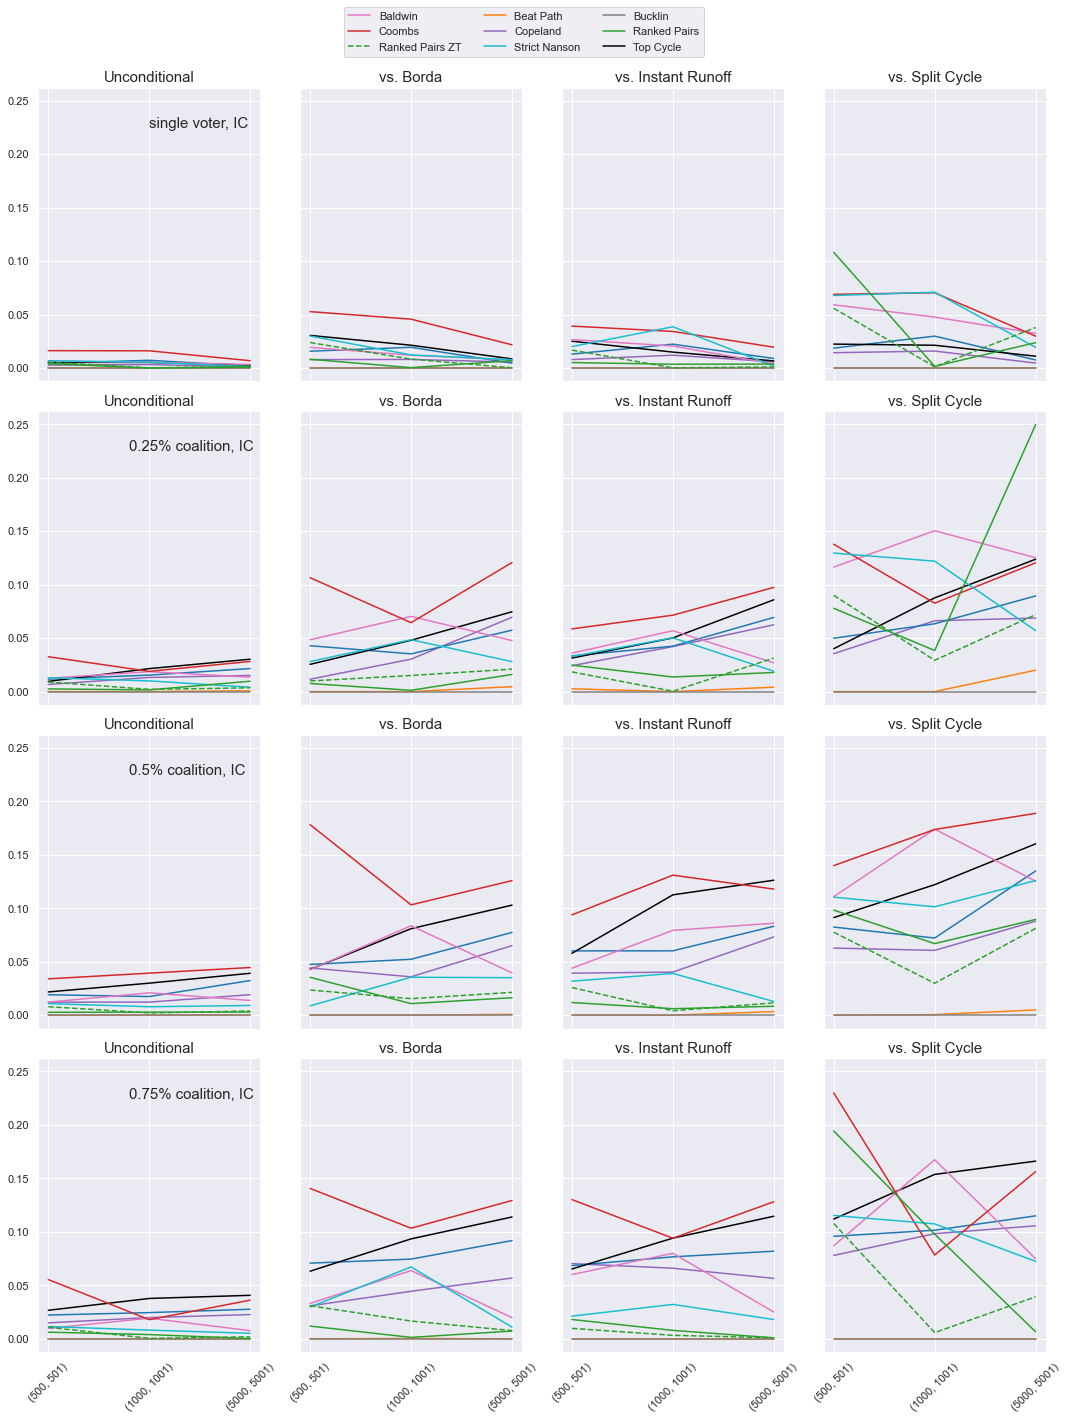

In [10]:
current_palette = sns.color_palette("tab10")

colors = {"Uncovered Set": current_palette[0], 
          "Beat Path": current_palette[1], 
          #"Llull": current_palette[2], 
          "Coombs": current_palette[3], 
          "Copeland": current_palette[4],
          "Borda": current_palette[5],
          "Baldwin": current_palette[2],
          "Ranked Pairs": current_palette[6],
          "Top Cycle": "black", #current_palette[7],
#           "GOCHA": "blue", #current_palette[7],
#           "Daunou": "gray", #current_palette[7],
           "Bucklin": current_palette[7],
#          "Weak Nanson": current_palette[8],
          "Strict Nanson": current_palette[9],
          "Ranked Pairs": current_palette[6]}


numer, denom = ("uniform", "either_diff", "pi_failure"), ("uniform", "either_diff", "winner_displaced")
#numer, denom = ("uniform", "new_prof_diff", "pi_failure"), ("uniform", "new_prof_diff", "winner_displaced")
num_voters = [
#     (4,5), 
#     (10,11),
#     (20,21),
#     (50,51),
#     (100,101),
    (500,501),
    (1000,1001), 
    (5000,5001), 
    #(2000,2001), 
    #(5000, 50001)
] 

vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]

current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "Beat Path": current_palette[1], 
    "Coombs": current_palette[3], 
    "Copeland": current_palette[4],
    "Borda": current_palette[5],
    "Baldwin": current_palette[6],
    "Top Cycle": "black",  
    "Bucklin": current_palette[7],
    "Strict Nanson": current_palette[9], 
    "Ranked Pairs": current_palette[2],
    "Ranked Pairs ZT": current_palette[2]
}

line_styles = {
    "Uncovered Set": "-", 
    "Beat Path":  "-",
    "Coombs":  "-",
    "Copeland":  "-",
    "Borda":  "-",
    "Baldwin":  "-",
    "Top Cycle":  "-", 
    "Bucklin":  "-",
    "Strict Nanson":  "-", 
    "Ranked Pairs":  "-",
    "Ranked Pairs ZT":  "--",  
}

new_colors = [current_palette[8]]

vms_violate_pi_new = {
    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
    blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}


def gen_fig4():

    def get_frequencies5(data, vm_to_compare, vm, nc, num_voters, pnv, gtype):

        return [data[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]][gtype][numer[2]] 
                for nv in num_voters]

    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 19), sharex=True, sharey=True)


    xs = [str(nv) for nv in num_voters]

    ####################

    for row_idx, pnv in enumerate(["S", 0.25, 0.5, 0.75]):
        vm_to_compare = split_cycle_faster
        nc = 5
        ax = axs[row_idx][0]
        for vm in vms_violate_pi:

            ax.plot(xs,
                    get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "all"), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color=colors[vm.name])
        vm=ranked_pairs
        ax.plot(xs,
                get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "all"), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
        ax.set_title("Unconditional", fontsize=15)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)


        vm_to_compare = borda
        ax = axs[row_idx][1]
        for vm in vms_violate_pi:
            ax.plot(xs,
                    get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "either_diff"), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color=colors[vm.name])
            
        vm=ranked_pairs
        ax.plot(xs,
                get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "either_diff"), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])

        #plt.suptitle(f"VM: {vm_to_compare.name},  pnv = {pnv}:   {numer} / {denom}\n\n")
        ax.set_title("vs. Borda", fontsize=15)

        for tick in ax.get_xticklabels():
            tick.set_rotation(45)

        vm_to_compare = hare
        ax = axs[row_idx][2]
        for vm in vms_violate_pi:
             ax.plot(xs,
                    get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "either_diff"), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color=colors[vm.name])

        vm=ranked_pairs
        ax.plot(xs,
                get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "either_diff"), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
        ax.set_title("vs. Instant Runoff", fontsize=15)

        for tick in ax.get_xticklabels():
            tick.set_rotation(45)


        vm_to_compare = split_cycle_faster
        ax = axs[row_idx][3]

        for vm in vms_violate_pi:
            ax.plot(xs,
                    get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "either_diff"), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color=colors[vm.name])

        vm=ranked_pairs
        ax.plot(xs,
                get_frequencies5(data_remove_voters_coalitions, vm_to_compare, vm, nc, num_voters, pnv, "either_diff"), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
        ax.set_title("vs. Split Cycle", fontsize=15)

        for tick in ax.get_xticklabels():
            tick.set_rotation(45)


    #plt.suptitle(f"Both\n\n\n")
    axs[0][0].text(1., 0.225, r'single voter, IC', fontsize=15)
    axs[1][0].text(0.8, 0.225, r'0.25% coalition, IC', fontsize=15)
    axs[2][0].text(0.8, 0.225, r'0.5% coalition, IC', fontsize=15)
    axs[3][0].text(0.8, 0.225, r'0.75% coalition, IC', fontsize=15)

    plt.tight_layout()

    handles, labels = axs[1][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 3, 6, 1, 4, 7, 2, 5, 8]
    plt.tight_layout()
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
               bbox_to_anchor=(-1.35,4.6),
               loc='upper center', 
               ncol = 3)


    plt.savefig("graphs_tark/coalitions.pdf", bbox_inches='tight')
    
gen_fig4()

## Figure 5

In [11]:

data_add_voters1 = pickle.load(open('data/IC_data_pi_failures_add_voters_new_methods2.pkl', "rb"))
data_add_voters_10 = pickle.load(open('data/IC_data_pi_failures_add_voters_new_methods2_10.pkl', "rb"))
_data_add_voters_rp = pickle.load(open('data/IC_data_pi_failures_add_voters_new_methods2_RP2.pkl', "rb"))
data_add_voters_rp = _data_add_voters_rp["IC"]


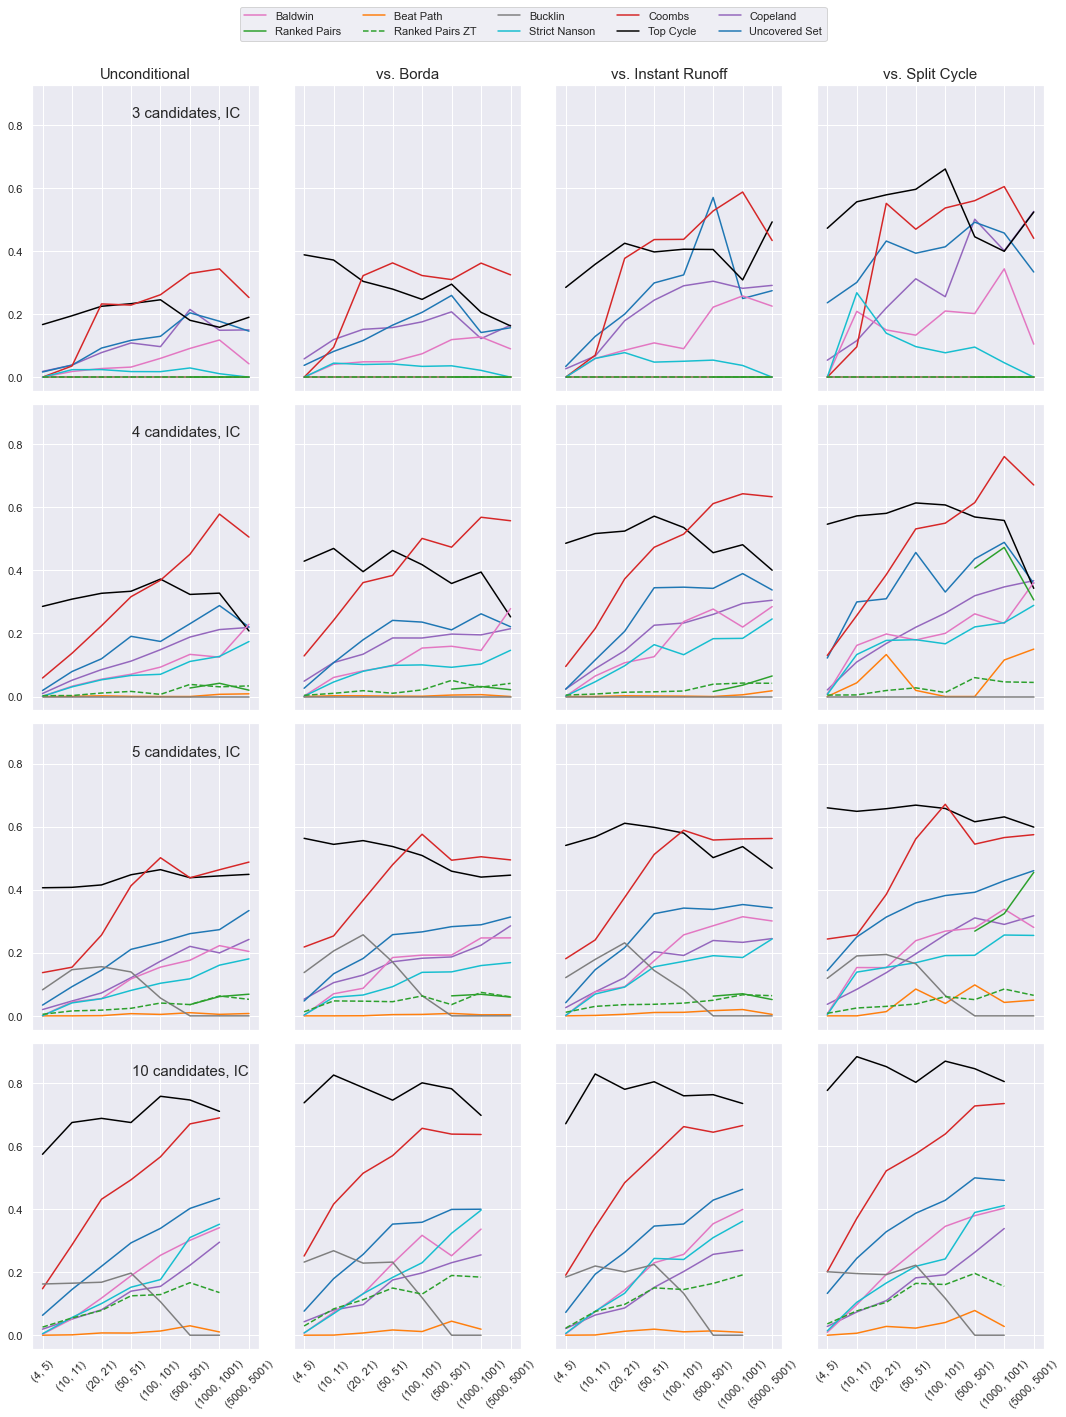

In [12]:
pnv = "S"
numer, denom = ("uniform", "either_diff", "pi_failure"), ("uniform", "either_diff", "winner_displaced")
#numer, denom = ("uniform", "new_prof_diff", "pi_failure"), ("uniform", "new_prof_diff", "winner_displaced")
num_cands = [
    3,
    4,
    5,

]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 
    (5000,5001), 
] 

vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]

current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "Beat Path": current_palette[1], 
    "Coombs": current_palette[3], 
    "Copeland": current_palette[4],
    "Borda": current_palette[5],
    "Baldwin": current_palette[6],
    "Top Cycle": "black",  
    "Bucklin": current_palette[7],
    "Strict Nanson": current_palette[9], 
    "Ranked Pairs": current_palette[2],
    "Ranked Pairs ZT": current_palette[2]
}

line_styles = {
    "Uncovered Set": "-", 
    "Beat Path":  "-",
    "Coombs":  "-",
    "Copeland":  "-",
    "Borda":  "-",
    "Baldwin":  "-",
    "Top Cycle":  "-", 
    "Bucklin":  "-",
    "Strict Nanson":  "-", 
    "Ranked Pairs":  "-",
    "Ranked Pairs ZT":  "--",  
}

new_colors = [current_palette[8]]

vms_violate_pi_new = {
    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
    blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}

def gen_fig5():
    
    fig, axs = plt.subplots(nrows=len(num_cands) + 1, ncols=4, figsize=(15, 19), sharex=True, sharey=True)

    xs = [str(nv) for nv in num_voters]

    def get_frequencies1(data, vm_to_compare, vm, num_voters): 

        return [data[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]][numer[1]][numer[2]] / data[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]][denom[1]][denom[2]]
                if data[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]][denom[1]][denom[2]] != 0 else 0
                for nv in num_voters]

    # All
    vm_to_compare = split_cycle_faster # not really comparing with SC
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm in vms_violate_pi:
             ax.plot(xs,[data_add_voters1[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_add_voters1[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] 
                        if data_add_voters1[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                        for nv in num_voters], 
                     line_styles[vm.name],
                     label=vm.name, 
                     color = colors[vm.name])

    vm = ranked_pairs 
    for nc_idx, nc in enumerate(num_cands): 
        ax = axs[nc_idx][0] 
        ax.plot(xs[5::],
                [data_add_voters_rp[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_add_voters_rp[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] 
                 if data_add_voters_rp[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                 for nv in num_voters[5::]], 
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


    vm_to_compare = borda
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies1(data_add_voters1, vm_to_compare, vm, num_voters),
                    line_styles[vm.name],
                    label=vm.name, 
                    color = colors[vm.name])
    vm = ranked_pairs
    for nc_idx, nc in enumerate(num_cands):  
        ax = axs[nc_idx][1]  
        ax.plot(xs[5::],
                get_frequencies1(data_add_voters_rp, vm_to_compare, vm, num_voters[5::]),
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies1(data_add_voters1, vm_to_compare, vm, num_voters), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color = colors[vm.name])
    vm = ranked_pairs
    for nc_idx, nc in enumerate(num_cands):  
        ax = axs[nc_idx][2]  
        ax.plot(xs[5::],
                get_frequencies1(data_add_voters_rp, vm_to_compare, vm, num_voters[5::]),
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies1(data_add_voters1, vm_to_compare, vm, num_voters), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color = colors[vm.name])

    vm = ranked_pairs
    for nc_idx, nc in enumerate(num_cands):  
        ax = axs[nc_idx][3]  
        ax.plot(xs[5::],
                get_frequencies1(data_add_voters_rp, vm_to_compare, vm, num_voters[5::]),
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

   #### 10 candidates #####     

    num_voters2 = num_voters[0:-1]
    xs = [str(nv) for nv in num_voters2]
    nc = 10
    nc_idx = 3
    vm_to_compare = split_cycle_faster
    ax = axs[nc_idx][0]
    for vm in vms_violate_pi:
        ax.plot(xs,
                [data_add_voters_10[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_add_voters_10[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] 
                 if data_add_voters_10[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                 for nv in num_voters2], 
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])


    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    ax = axs[nc_idx][1]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies1(data_add_voters_10, vm_to_compare, vm, num_voters2), 
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])

 
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    ax = axs[nc_idx][2]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies1(data_add_voters_10, vm_to_compare, vm, num_voters2), 
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])
 
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    ax = axs[nc_idx][3]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies1(data_add_voters_10, vm_to_compare, vm, num_voters2), 
                line_styles[vm.name],
                label=vm.name, 
                color = colors[vm.name])
 
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    axs[nc_idx][3].set_xticks(list(axs[nc_idx][3].get_xticks()) + [7])
    axs[nc_idx][3].set_xticklabels([str(nv) for nv in num_voters])

    axs[0][0].set_title("Unconditional",fontsize=15)
    axs[0][1].set_title("vs. Borda",fontsize=15)
    axs[0][2].set_title("vs. Instant Runoff",fontsize=15)
    axs[0][3].set_title("vs. Split Cycle",fontsize=15)

    axs[0][0].text(3.05, 0.825, r'3 candidates, IC', fontsize=15)
    axs[1][0].text(3.05, 0.825, r'4 candidates, IC', fontsize=15)
    axs[2][0].text(3.05, 0.825, r'5 candidates, IC', fontsize=15)
    axs[3][0].text(3.05, 0.825, r'10 candidates, IC', fontsize=15)


    handles, labels = axs[2][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 5, 1, 6, 2, 7, 3, 8, 4, 9]
    plt.tight_layout()
    
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
                bbox_to_anchor=(-1.25,4.4), 
                loc='upper center', 
                ncol = 5)

    plt.savefig("graphs_tark/addvotersrel.pdf", bbox_inches='tight')

gen_fig5()

### Comparing with Instant Runoff PUT

In [13]:

data_add_voters_hare_put = pickle.load(open('data/IC_data_pi_failures_add_voters_new_methods_hare_put.pkl', "rb")) 


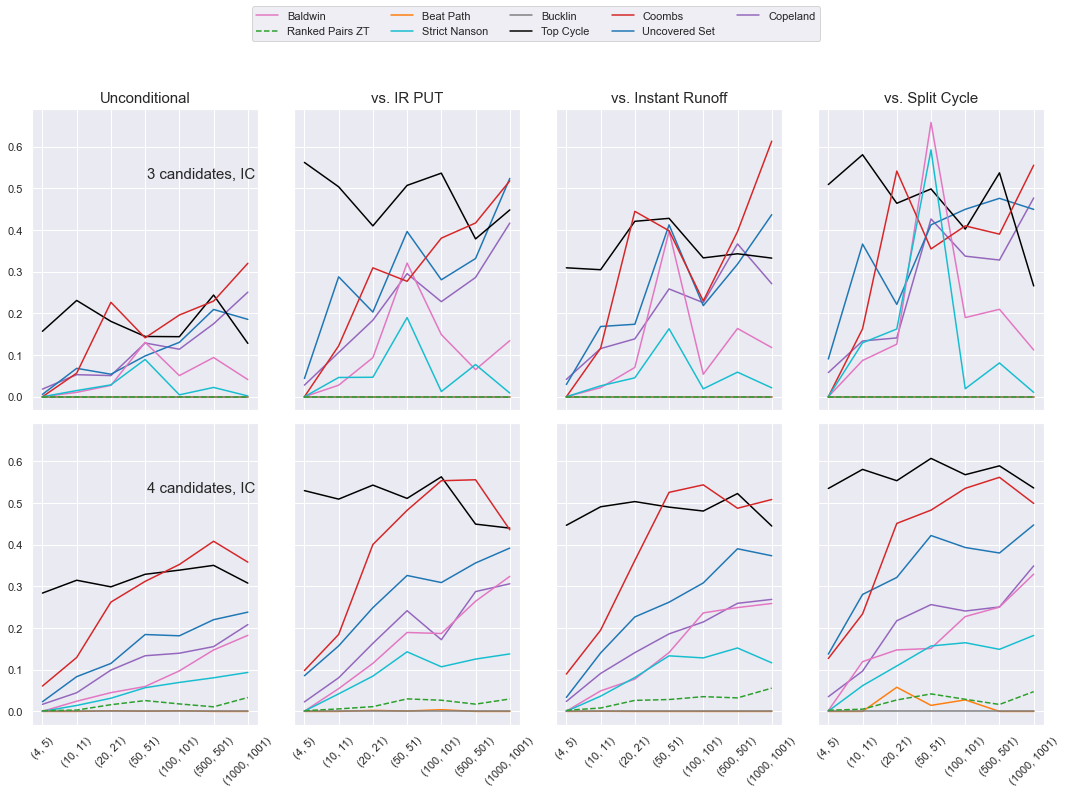

In [14]:
data_add_voters1 = data_add_voters_hare_put
pnv = "S"
numer, denom = ("uniform", "either_diff", "pi_failure"), ("uniform", "either_diff", "winner_displaced")
#numer, denom = ("uniform", "new_prof_diff", "pi_failure"), ("uniform", "new_prof_diff", "winner_displaced")
num_cands = [
    3,
    4,
#    5,

]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 
#    (5000,5001), 
] 

vms_sat_pi = [
    split_cycle_faster,
    hare, 
    hare_put
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]

current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "Beat Path": current_palette[1], 
    "Coombs": current_palette[3], 
    "Copeland": current_palette[4],
    "Borda": current_palette[5],
    "Baldwin": current_palette[6],
    "Top Cycle": "black",  
    "Bucklin": current_palette[7],
    "Strict Nanson": current_palette[9], 
    "Ranked Pairs": current_palette[2],
    "Ranked Pairs ZT": current_palette[2]
}

line_styles = {
    "Uncovered Set": "-", 
    "Beat Path":  "-",
    "Coombs":  "-",
    "Copeland":  "-",
    "Borda":  "-",
    "Baldwin":  "-",
    "Top Cycle":  "-", 
    "Bucklin":  "-",
    "Strict Nanson":  "-", 
    "Ranked Pairs":  "-",
    "Ranked Pairs ZT":  "--",  
}

new_colors = [current_palette[8]]

vms_violate_pi_new = {
    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
    blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}

def gen_fig5b():
    
    fig, axs = plt.subplots(nrows=len(num_cands), ncols=4, figsize=(15, 10), sharex=True, sharey=True)

    xs = [str(nv) for nv in num_voters]

    def get_frequencies1(data, vm_to_compare, vm, num_voters): 

        return [data[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]][numer[1]][numer[2]] / data[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]][denom[1]][denom[2]]
                if data[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]][denom[1]][denom[2]] != 0 else 0
                for nv in num_voters]

    # All
    vm_to_compare = split_cycle_faster # not really comparing with SC
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][0]    
        for vm in vms_violate_pi:
             ax.plot(xs,[data_add_voters1[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_add_voters1[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] 
                        if data_add_voters1[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                        for nv in num_voters], 
                     line_styles[vm.name],
                     label=vm.name, 
                     color = colors[vm.name])


    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


    vm_to_compare = hare_put
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][1]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies1(data_add_voters1, vm_to_compare, vm, num_voters),
                    line_styles[vm.name],
                    label=vm.name, 
                    color = colors[vm.name])

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][2]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies1(data_add_voters1, vm_to_compare, vm, num_voters), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color = colors[vm.name])

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    for nc_idx, nc in enumerate(num_cands):
        ax = axs[nc_idx][3]    
        for vm in vms_violate_pi:
            ax.plot(xs, 
                    get_frequencies1(data_add_voters1, vm_to_compare, vm, num_voters), 
                    line_styles[vm.name],
                    label=vm.name, 
                    color = colors[vm.name])


    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


        
    axs[0][0].set_title("Unconditional",fontsize=15)
    axs[0][1].set_title("vs. IR PUT",fontsize=15)
    axs[0][2].set_title("vs. Instant Runoff",fontsize=15)
    axs[0][3].set_title("vs. Split Cycle",fontsize=15)

    axs[0][0].text(3.05, 0.525, r'3 candidates, IC', fontsize=15)
    axs[1][0].text(3.05, 0.525, r'4 candidates, IC', fontsize=15)
#    axs[2][0].text(3.05, 0.825, r'5 candidates, IC', fontsize=15)
#    axs[3][0].text(3.05, 0.825, r'10 candidates, IC', fontsize=15)


    handles, labels = axs[1][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 5, 1, 6, 2, 7, 3, 8, 4]
    plt.tight_layout()
    
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
                bbox_to_anchor=(-1.25,2.4), 
                loc='upper center', 
                ncol = 5)

    plt.savefig("graphs_tark/addvotersrel_hare_put.pdf", bbox_inches='tight')

gen_fig5b()

## Figure 6

In [15]:
data_pms = pickle.load(open('data/PROB_MODS_data_pi_failures_add_voters_new_methods2.pkl', "rb"))
data_IC = pickle.load(open('data/IC_data_pi_failures_add_voters_new_methods2.pkl', "rb"))
data_pms_rp = pickle.load(open('data/PMS_data_pi_failures_add_voters_new_methods2_RP.pkl', "rb"))


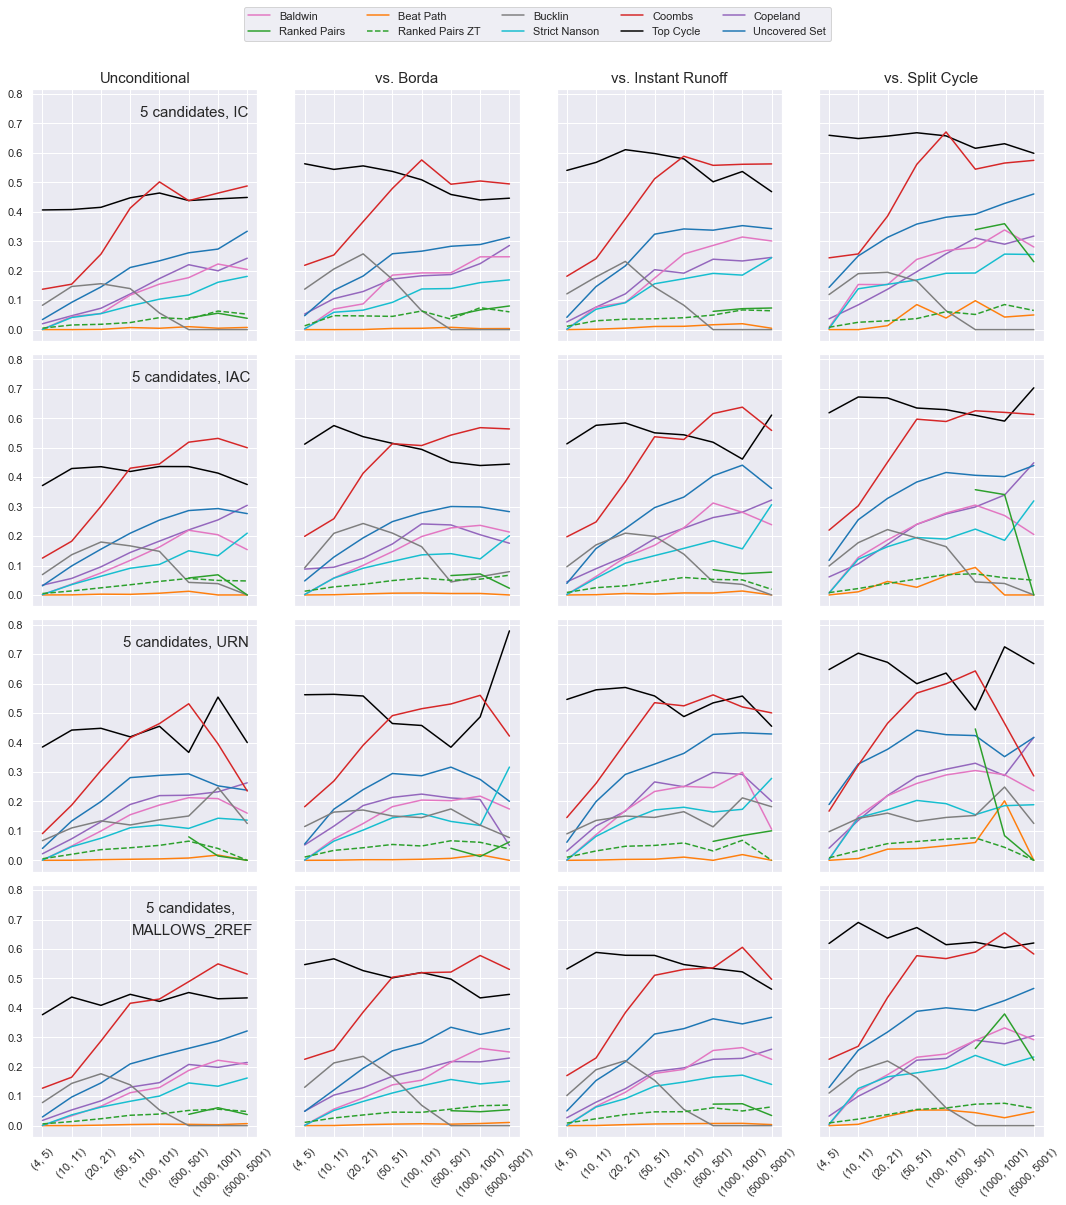

In [16]:
pnv = "S"# 0.5 #"S" #0.5 # "S" #0.25 #"S" # "S" #"S" #"S"

numer, denom = ("uniform", "either_diff", "pi_failure"), ("uniform", "either_diff", "winner_displaced")
#numer, denom = ("uniform", "new_prof_diff", "pi_failure"), ("uniform", "new_prof_diff", "winner_displaced")
num_cands = [
    5,
]
num_voters = [
    (4,5), 
    (10,11),
    (20,21),
    (50,51),
    (100,101),
    (500,501),
    (1000,1001), 
    (5000,5001), 
    #(2000,2001), 
    #(5000, 50001)
] 

vms_sat_pi = [
    split_cycle_faster,
    hare, 
    borda
]    
    
vms_violate_pi = [
    beat_path_faster,
    copeland,
    uc_gill,
    getcha, 
    baldwin, 
    coombs,
    strict_nanson, 
    bucklin, 
    ranked_pairs_zt
]

current_palette = sns.color_palette("tab10")

colors = {
    "Uncovered Set": current_palette[0], 
    "Beat Path": current_palette[1], 
    "Coombs": current_palette[3], 
    "Copeland": current_palette[4],
    "Borda": current_palette[5],
    "Baldwin": current_palette[6],
    "Top Cycle": "black",  
    "Bucklin": current_palette[7],
    "Strict Nanson": current_palette[9], 
    "Ranked Pairs": current_palette[2],
    "Ranked Pairs ZT": current_palette[2]
}

line_styles = {
    "Uncovered Set": "-", 
    "Beat Path":  "-",
    "Coombs":  "-",
    "Copeland":  "-",
    "Borda":  "-",
    "Baldwin":  "-",
    "Top Cycle":  "-", 
    "Bucklin":  "-",
    "Strict Nanson":  "-", 
    "Ranked Pairs":  "-",
    "Ranked Pairs ZT":  "--",  
}

new_colors = [current_palette[8]]

vms_violate_pi_new = {
    llull.name: llull,
    gocha.name: gocha, 
    weak_nanson.name: weak_nanson,
    daunou.name: daunou,
    simplified_bucklin.name: simplified_bucklin, 
    blacks.name: blacks,
    ranked_pairs_t.name: ranked_pairs_t
}


def gen_fig6():
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,16), sharex=True, sharey=True)

    def get_frequencies3(data, vm_to_compare, vm, num_voters, pm): 
        
        if pm == "IC":
            _data = data
        else: 
            _data = data[pm]
        return [_data[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]][numer[1]][numer[2]] / _data[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]][denom[1]][denom[2]]
                    if _data[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]][denom[1]][denom[2]] != 0 else 0
                    for nv in num_voters]

    xs = [str(nv) for nv in num_voters]

    pm = "IC"
    row_idx = 0
    nc = 5
    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][0]
    for vm in vms_violate_pi:
        ax.plot(xs,
                [data_IC[vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_IC[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
                 if data_IC[vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                 for nv in num_voters],
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])

    vm = ranked_pairs
    ax.plot(xs[5::],
            [data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
             if data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
             for nv in num_voters[5::]],
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    ax = axs[row_idx][1]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_IC, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp[pm], vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    ax = axs[row_idx][2]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_IC, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp[pm], vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][3]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_IC, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp[pm], vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)


    pm = "IAC"
    row_idx = 1
    nc = 5
    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][0]
    for vm in vms_violate_pi:
        ax.plot(xs,
                [data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
                 if data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                 for nv in num_voters], 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            [data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
             if data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
             for nv in num_voters[5::]], 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])        
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    ax = axs[row_idx][1]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    ax = axs[row_idx][2]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][3]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    pm = "URN"
    row_idx = 2
    nc = 5
    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][0]
    for vm in vms_violate_pi:
        ax.plot(xs,
                [data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
                 if data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                 for nv in num_voters], 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])

    vm = ranked_pairs
    ax.plot(xs[5::],
            [data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
             if data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
             for nv in num_voters[5::]], 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    ax = axs[row_idx][1]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    ax = axs[row_idx][2]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][3]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    pm = "MALLOWS_2REF"
    row_idx = 3
    nc = 5
    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][0]
    for vm in vms_violate_pi:
        ax.plot(xs,
                [data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
                 if data_pms[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
                 for nv in num_voters], 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            [data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][numer[0]]["all"][numer[2]] / data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]]
             if data_pms_rp[pm][vm_to_compare.name][vm.name][(nc, nv)][pnv][denom[0]]["all"][denom[2]] != 0 else 0
             for nv in num_voters[5::]], 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = borda
    ax = axs[row_idx][1]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = hare
    ax = axs[row_idx][2]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    vm_to_compare = split_cycle_faster
    ax = axs[row_idx][3]
    for vm in vms_violate_pi:
        ax.plot(xs,
                get_frequencies3(data_pms, vm_to_compare, vm, num_voters, pm), 
                line_styles[vm.name],
                label=vm.name, 
                color=colors[vm.name])
    vm = ranked_pairs
    ax.plot(xs[5::],
            get_frequencies3(data_pms_rp, vm_to_compare, vm, num_voters[5::], pm), 
            line_styles[vm.name],
            label=vm.name, 
            color=colors[vm.name])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    axs[0][0].set_title("Unconditional",fontsize=15)
    axs[0][1].set_title("vs. Borda",fontsize=15)
    axs[0][2].set_title("vs. Instant Runoff",fontsize=15)
    axs[0][3].set_title("vs. Split Cycle",fontsize=15)

    axs[0][0].text(3.35, 0.725, r'5 candidates, IC', fontsize=15)
    axs[1][0].text(3.05, 0.725, r'5 candidates, IAC', fontsize=15)
    axs[2][0].text(2.75, 0.725, r'5 candidates, URN', fontsize=15)
    axs[3][0].text(3.55, 0.725, r'5 candidates,', fontsize=15)
    axs[3][0].text(3.05, 0.65, r'MALLOWS_2REF', fontsize=15)


    handles, labels = axs[1][0].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    l_indices = [0, 5, 1, 6, 2, 7, 3, 8, 4, 9]
    plt.tight_layout()
    vname_update = lambda vname: vname if vname != "Ranked Pairs V" else "Ranked Pairs ZT"
    plt.legend([handles[l_idx] for l_idx in l_indices], [vname_update(labels[l_idx]) for l_idx in l_indices], 
                bbox_to_anchor=(-1.25,4.5), 
                loc='upper center', 
                ncol = 5)
    plt.savefig("graphs_tark/PMaddvotersrel.pdf", bbox_inches='tight')
    
gen_fig6()